# Final Project - Stock Market Analysis


## Getting the Data from yfinance

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime(2024, 4, 19) #datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMAZON
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200,AMAZON
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON
2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300,AMAZON
2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400,AMAZON
2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300,AMAZON
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMAZON


In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.055318,182.524325,179.706151,181.177103,180.762863,5.778724e+07
std,8.859288,8.703874,8.804734,8.785578,8.789402,1.763238e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.157501,174.680004,172.027504,173.637505,173.225121,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.368500e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.392830e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-19 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Analysis on Closing Price

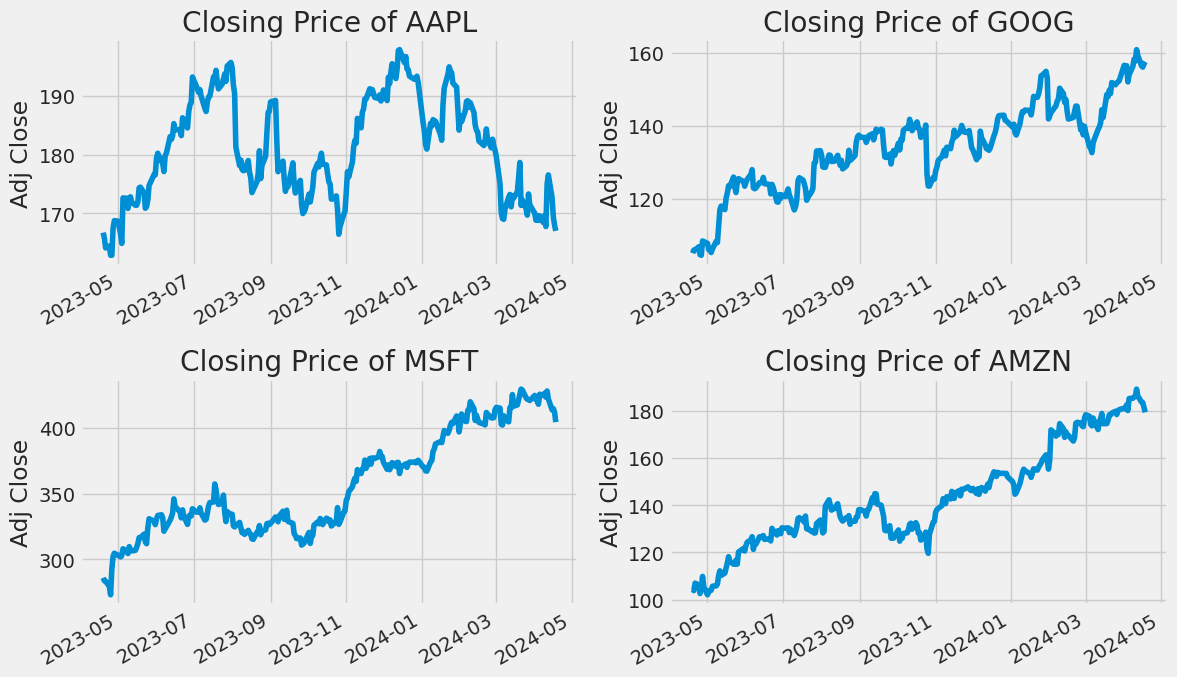

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales

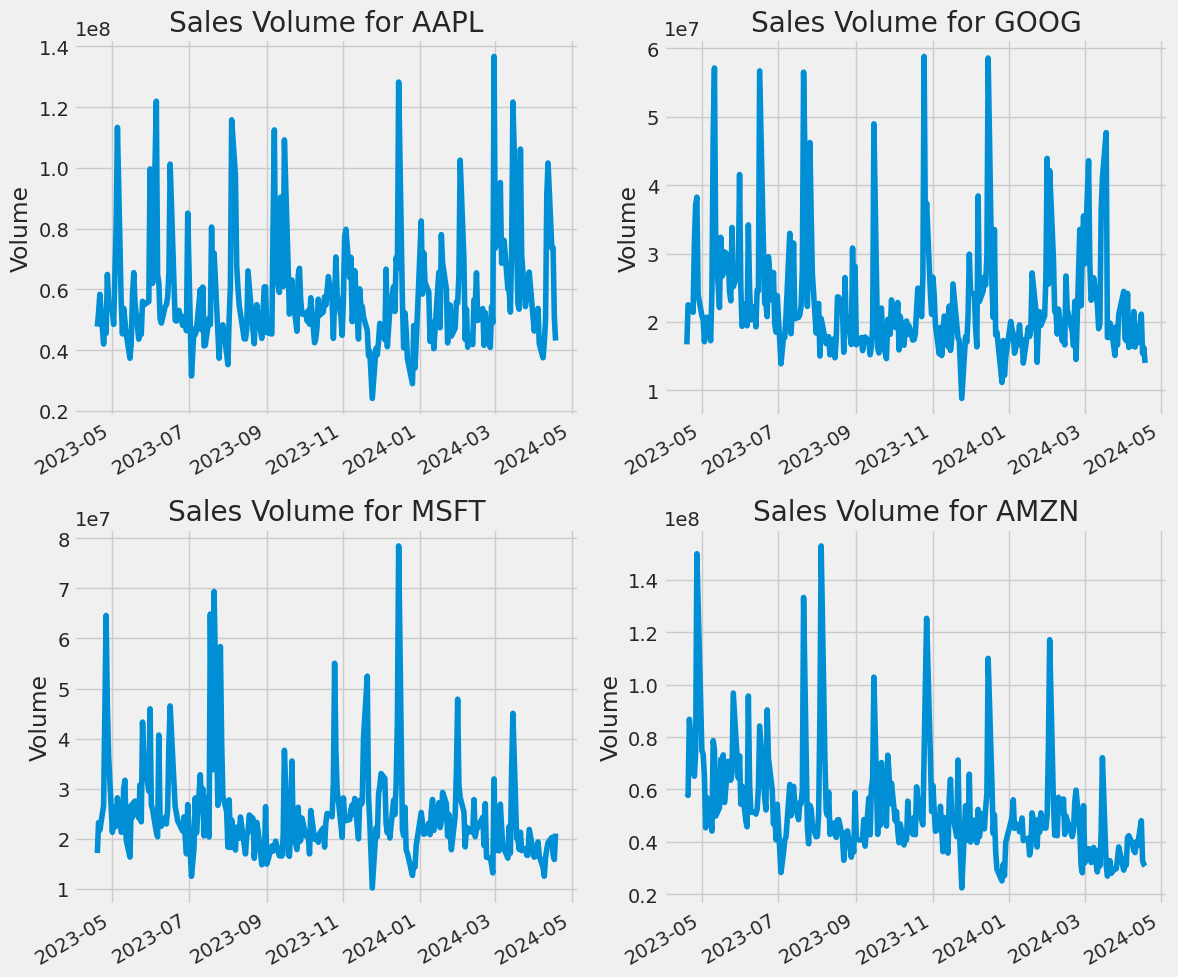

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

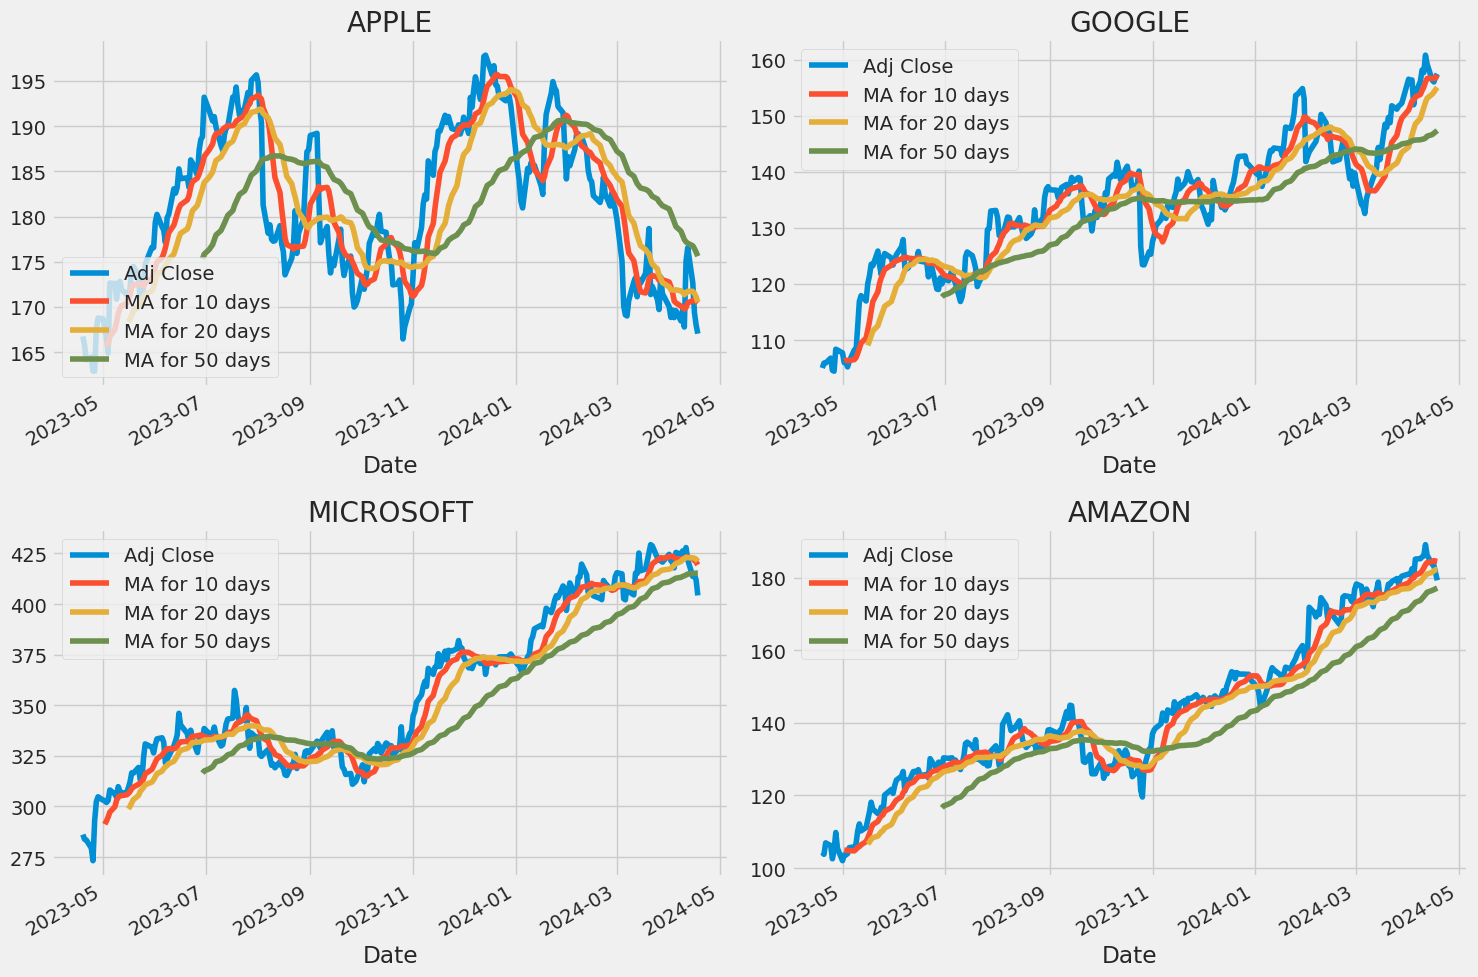

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

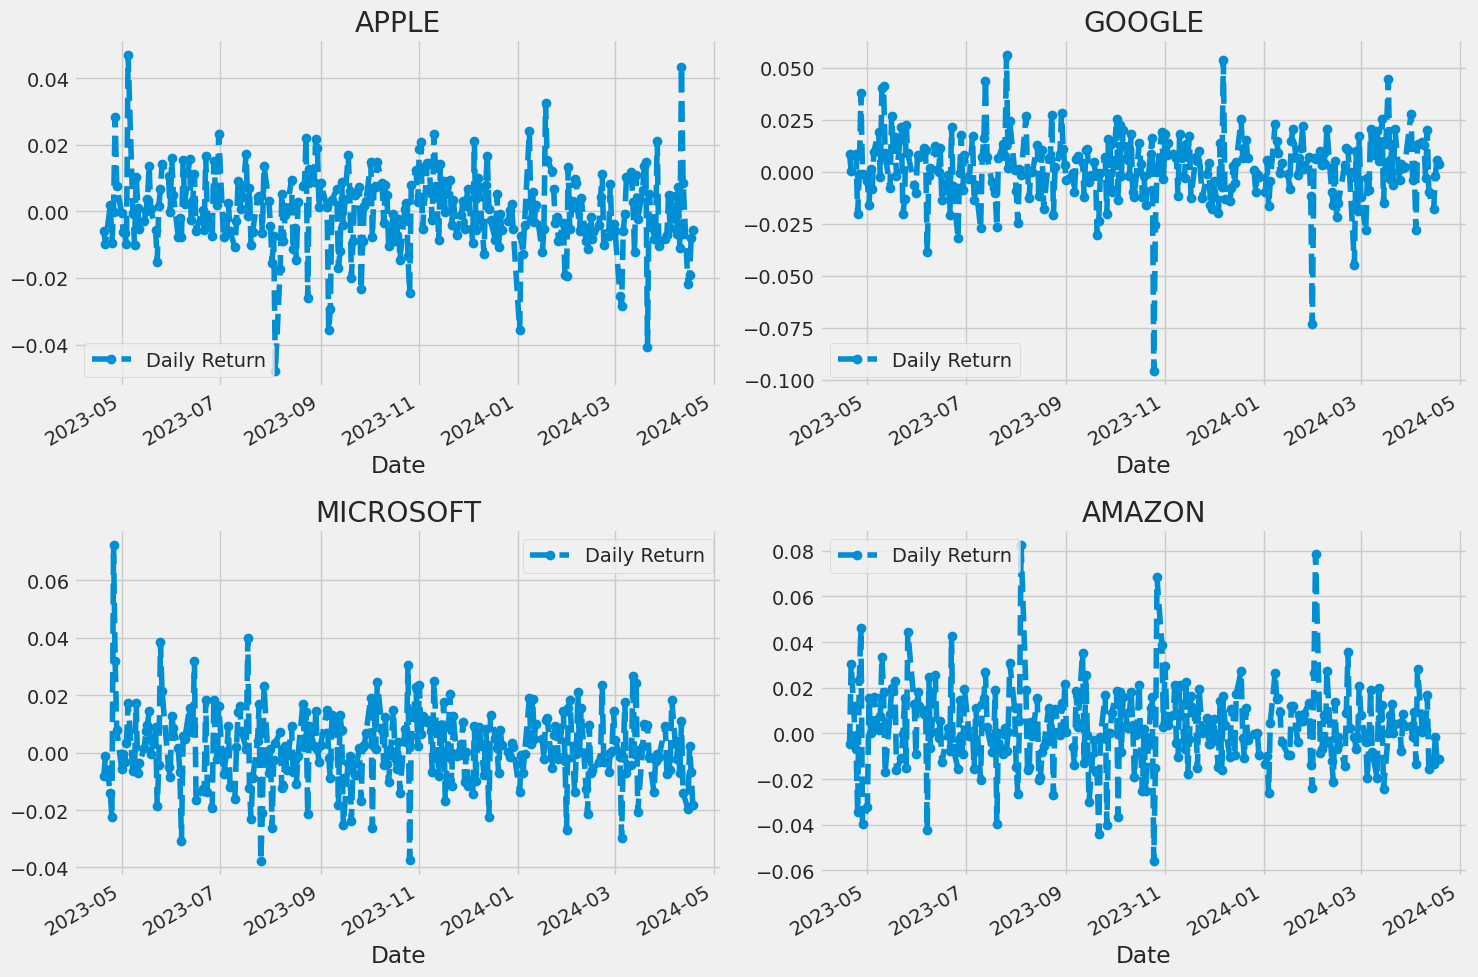

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

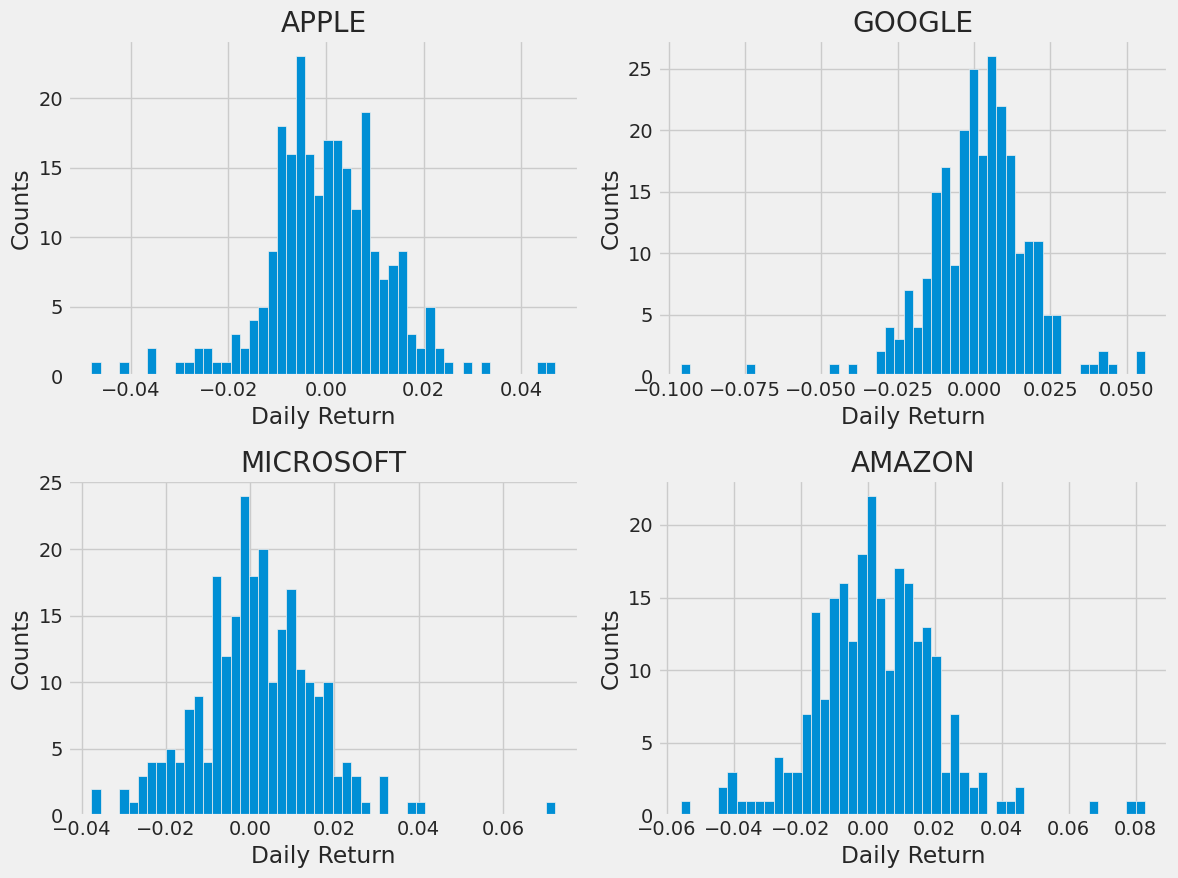

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-19,NaN,NaN,NaN,NaN
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112
2023-04-21,-0.009781,0.030344,0.000094,-0.001223
2023-04-24,0.001879,-0.007012,0.008214,-0.013963
2023-04-25,-0.009436,-0.034272,-0.020322,-0.022536


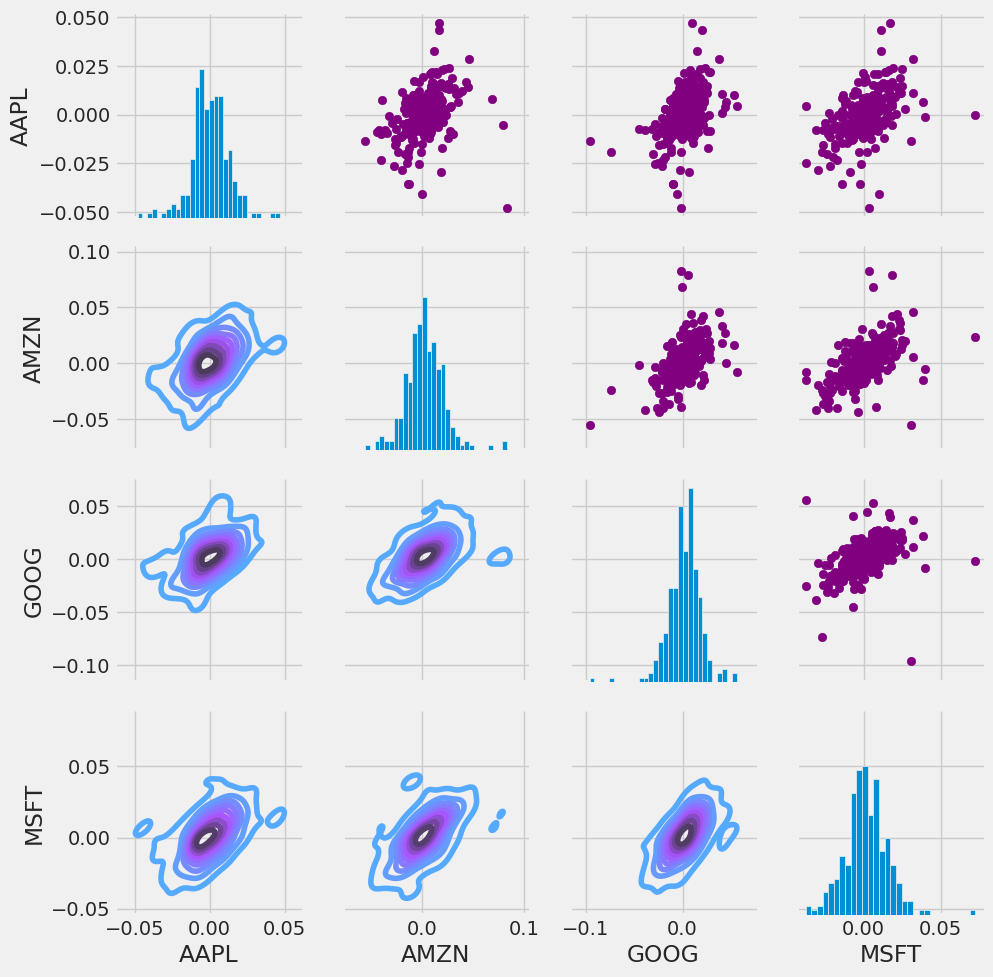

In [11]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

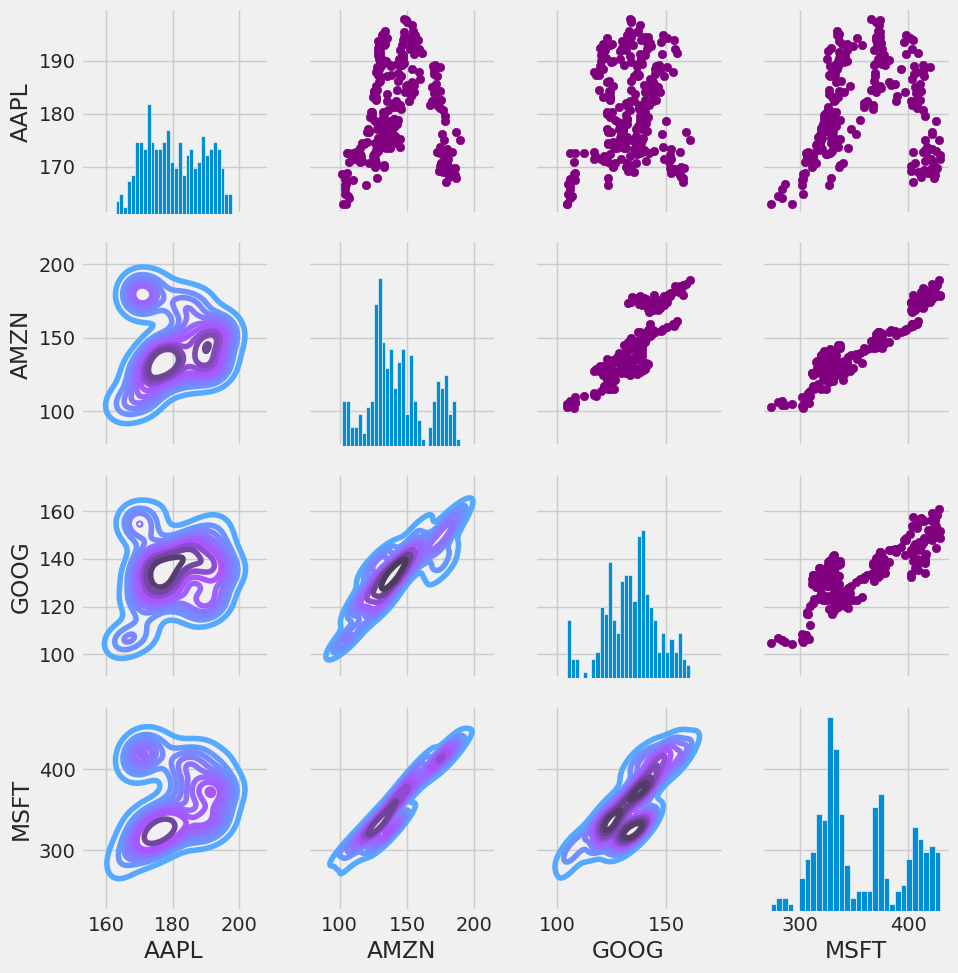

In [12]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

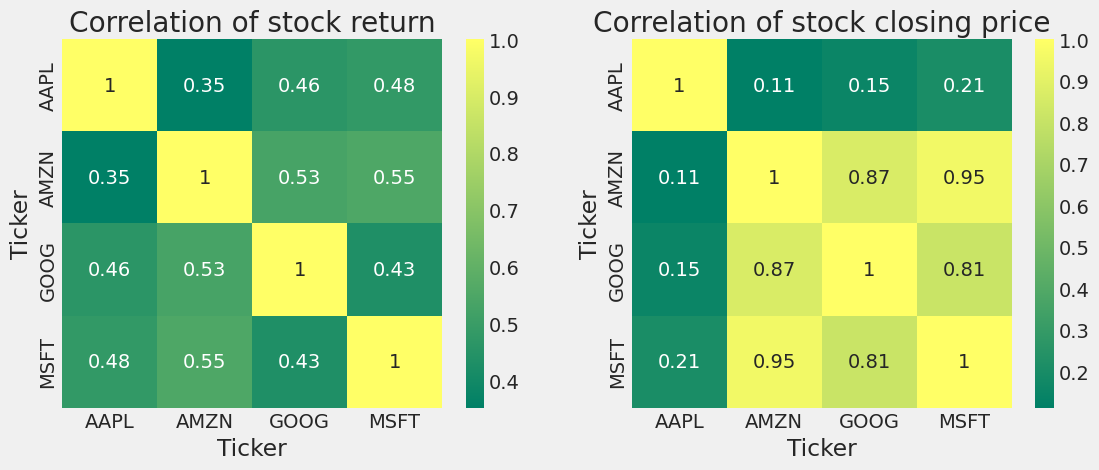

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

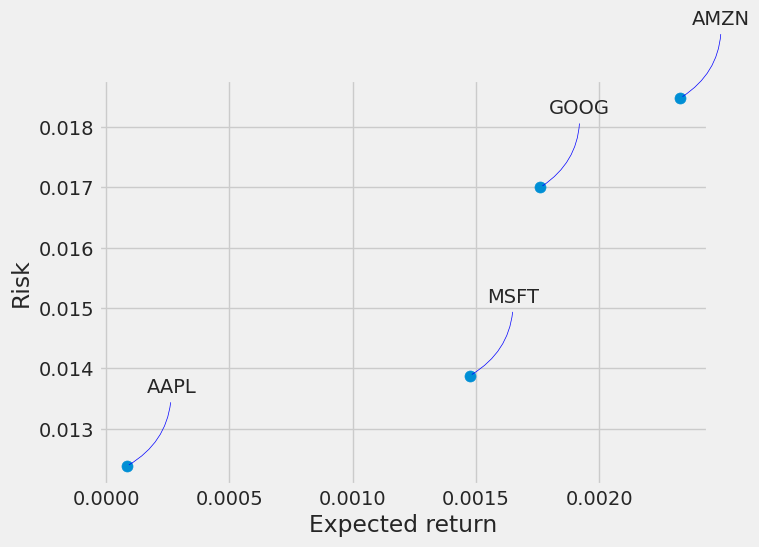

In [14]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(7, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end= datetime(2024, 4, 20)) #datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200


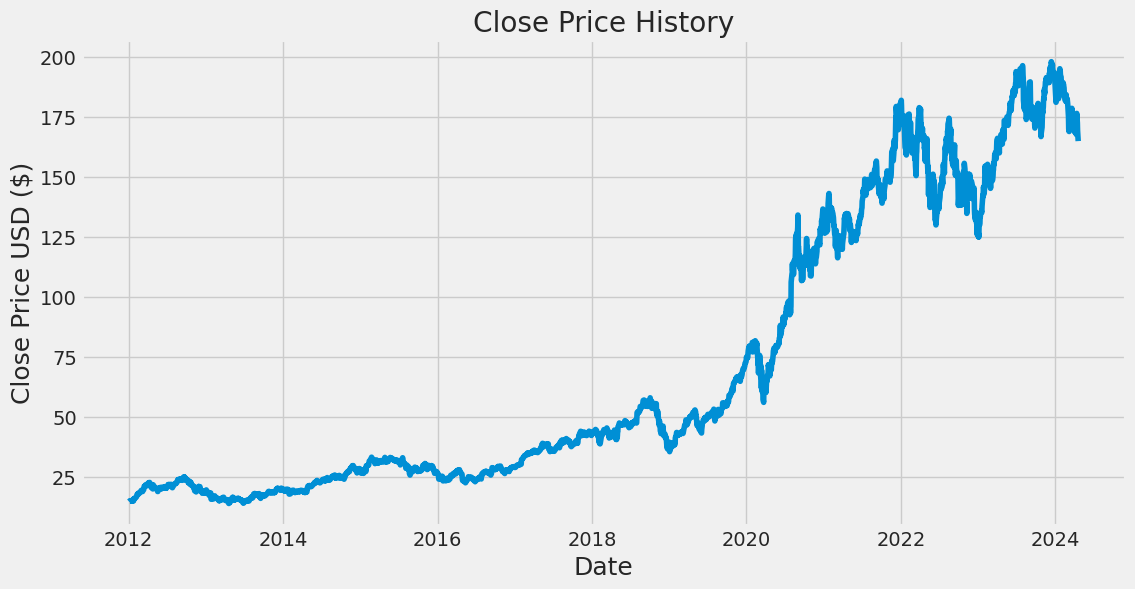

In [20]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Data Preparation

In [21]:
# Create a new dataframe with only the 'Close column
# data = df.drop(columns=['Close'])
data = df
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [23]:
# Create the training data set
# Create the scaled training data set
train_data = dataset[0:int(training_data_len)- 60, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
x_train = np.delete(train_data, 3, axis=1)
y_train = train_data[:, np.arange(train_data.shape[1]) == 3]


## LSTM Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model_lstm.fit(x_train, y_train, batch_size=1, epochs=200)

Epoch 1/200
2880/2880 [==============================] - 21s 5ms/step - loss: 298.4252
Epoch 2/200
2880/2880 [==============================] - 19s 7ms/step - loss: 10.6694
Epoch 3/200
2880/2880 [==============================] - 14s 5ms/step - loss: 7.7947
Epoch 4/200
2880/2880 [==============================] - 14s 5ms/step - loss: 9.3405
Epoch 5/200
2880/2880 [==============================] - 14s 5ms/step - loss: 6.2945
Epoch 6/200
2880/2880 [==============================] - 14s 5ms/step - loss: 8.4163
Epoch 7/200
2880/2880 [==============================] - 14s 5ms/step - loss: 6.0398
Epoch 8/200
2880/2880 [==============================] - 15s 5ms/step - loss: 8.8265
Epoch 9/200
2880/2880 [==============================] - 14s 5ms/step - loss: 4.2960
Epoch 10/200
2880/2880 [==============================] - 14s 5ms/step - loss: 6.2750
Epoch 11/200
2880/2880 [==============================] - 14s 5ms/step - loss: 4.4304
Epoch 12/200
2880/2880 [==============================] - 14

In [25]:
print(x_train.shape)
print(y_train.shape)

(2880, 5)
(2880, 1)


In [26]:
# Create the testing data set
test_data = dataset[- 60:, :]
x_test = []
y_test = []

x_test = np.delete(test_data, 3, axis=1)
y_test = test_data[:, np.arange(test_data.shape[1]) == 3]


In [27]:
# Get the models predicted price values
predictions_lstm = model_lstm.predict(x_test)
# print(predictions)

scaler_shape = scaler.scale_.shape
print("Scaler shape:", scaler_shape)
# # # Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_lstm - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 6ms/step
Scaler shape: (6,)


3.085117530942791

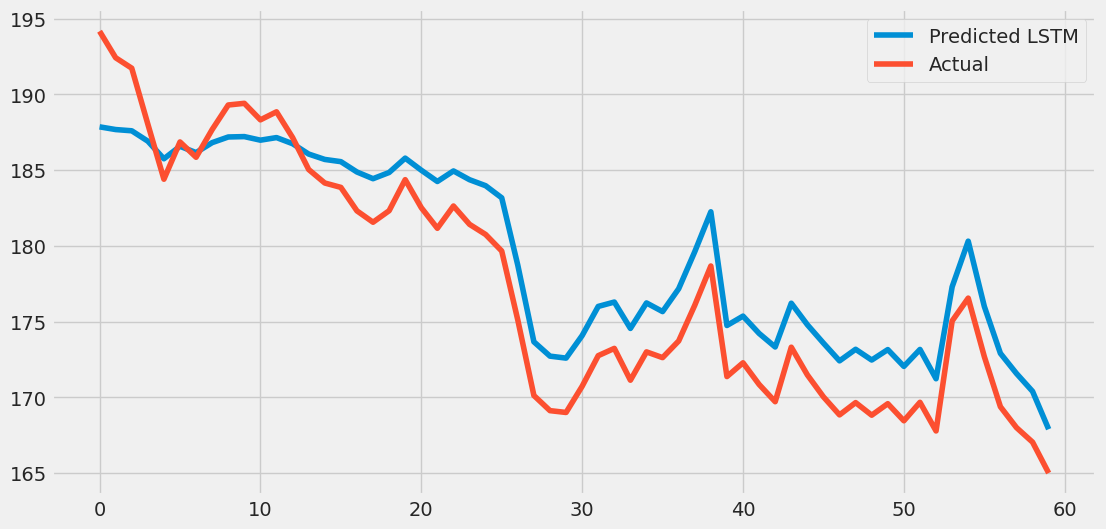

In [28]:
# Plot the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(predictions_lstm, label='Predicted LSTM')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [29]:
valid = data.copy()
print(valid)

# valid['Prediction'] = np.array(predictions).reshape(-1)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433825   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500646   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639427   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771556   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751301   
...                ...         ...         ...         ...         ...   
2024-04-15  175.360001  176.630005  172.500000  172.690002  172.690002   
2024-04-16  171.750000  173.759995  168.270004  169.380005  169.380005   
2024-04-17  169.610001  170.649994  168.000000  168.000000  168.000000   
2024-04-18  168.029999  168.639999  166.550003  167.039993  167.039993   
2024-04-19  166.210007  166.399994  164.080002  165.000000  165.000000   

               Volume  
Date         

## CNN Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape x_train to match the input shape
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D())
model_cnn.add(Conv1D(32, 1, activation='relu'))  # Changed kernel size to 2
model_cnn.add(Flatten())
model_cnn.add(Dense(25, activation='relu'))
model_cnn.add(Dense(1))

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_cnn.fit(x_train_reshaped, y_train, batch_size=1, epochs=200)

Epoch 1/200
2880/2880 [==============================] - 12s 3ms/step - loss: 29.0274
Epoch 2/200
2880/2880 [==============================] - 9s 3ms/step - loss: 3.4364
Epoch 3/200
2880/2880 [==============================] - 9s 3ms/step - loss: 4.2412
Epoch 4/200
2880/2880 [==============================] - 8s 3ms/step - loss: 3.8718
Epoch 5/200
2880/2880 [==============================] - 9s 3ms/step - loss: 2.6908
Epoch 6/200
2880/2880 [==============================] - 9s 3ms/step - loss: 3.1562
Epoch 7/200
2880/2880 [==============================] - 9s 3ms/step - loss: 2.4140
Epoch 8/200
2880/2880 [==============================] - 8s 3ms/step - loss: 2.5755
Epoch 9/200
2880/2880 [==============================] - 9s 3ms/step - loss: 2.4207
Epoch 10/200
2880/2880 [==============================] - 9s 3ms/step - loss: 2.2193
Epoch 11/200
2880/2880 [==============================] - 9s 3ms/step - loss: 2.2131
Epoch 12/200
2880/2880 [==============================] - 9s 3ms/step - 

In [31]:
# Get the models predicted price values
predictions_cnn = model_cnn.predict(x_test)
# print(predictions)

scaler_shape = scaler.scale_.shape
print("Scaler shape:", scaler_shape)
# # # Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_cnn - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 88ms/step
Scaler shape: (6,)


1.6095930704036177

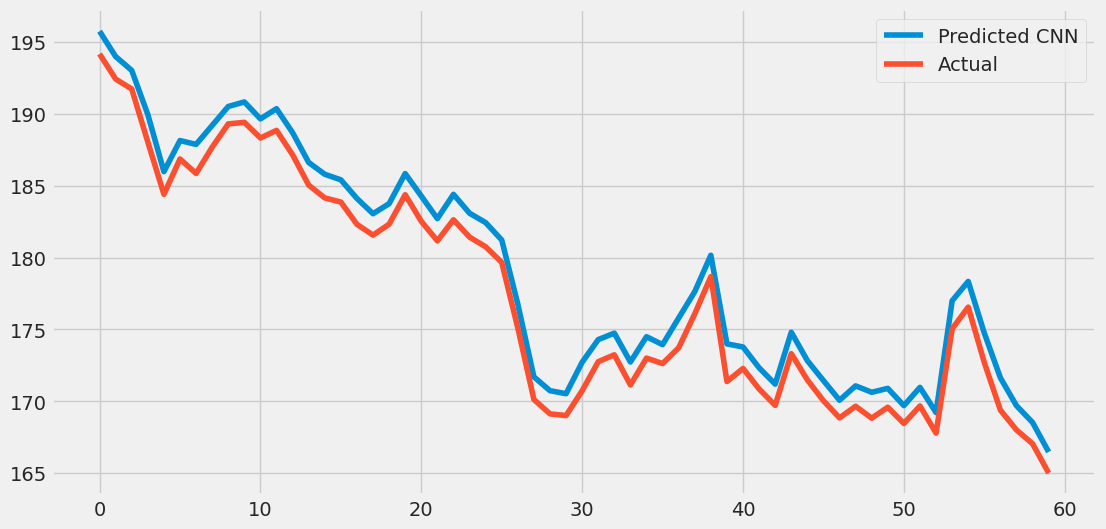

In [32]:
# Plot the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(predictions_cnn, label='Predicted CNN')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()